## Here we are going to calculate the streaks in NBA
### Calculating streaks by test data

In [1]:
import pandas as pd
import numpy as np

### Creating test Streak data

In [4]:
np.random.seed(23)
seq = np.random.choice(["make","miss"], size=10, p=[.65, .35])
streaks = pd.Series(seq, name="result").to_frame()
streaks

,result
0,make
1,miss
2,miss
3,make
4,make
5,miss
6,make
7,make
8,make
9,make


### Identify start of each streak

In [5]:
streaks["start_of_streak"] = streaks.result.ne(streaks['result'].shift())
streaks

,result,start_of_streak
0,make,True
1,miss,True
2,miss,False
3,make,True
4,make,False
5,miss,True
6,make,True
7,make,False
8,make,False
9,make,False


### Creating streak Id

In [6]:
streaks['streak_id'] = streaks['start_of_streak'].cumsum()
streaks

,result,start_of_streak,streak_id
0,make,True,1
1,miss,True,2
2,miss,False,2
3,make,True,3
4,make,False,3
5,miss,True,4
6,make,True,5
7,make,False,5
8,make,False,5
9,make,False,5


### Counting our streaks

In [7]:
streaks['streak_counter'] = streaks.groupby('streak_id').cumcount() + 1
streaks

,result,start_of_streak,streak_id,streak_counter
0,make,True,1,1
1,miss,True,2,1
2,miss,False,2,2
3,make,True,3,1
4,make,False,3,2
5,miss,True,4,1
6,make,True,5,1
7,make,False,5,2
8,make,False,5,3
9,make,False,5,4


### Now creating a streak function

In [9]:
def generate_streak_info(shots):
    data = shots["result"].to_frame()
    data['start_of_streak'] = data['result'].ne(data['result'].shift())
    data["streak_id"] = data.start_of_streak.cumsum()
    data["streak_counter"] = data.groupby("streak_id").cumcount() + 1
    shots_with_streaks = pd.concat([shots, data["streak_counter"]], axis=1)
    return shots_with_streaks


shots = streaks["result"].to_frame()
generate_streak_info(shots)

,result,streak_counter
0,make,1
1,miss,1
2,miss,2
3,make,1
4,make,2
5,miss,1
6,make,1
7,make,2
8,make,3
9,make,4


### Now working with the NBA dataset

In [45]:
shot_data = pd.read_csv("playoff_shots.csv")

In [11]:
shot_data

,game_id,game_code,game_description,period,period_time,player_name,player_id,team,shot_type,result
0,41700151,20180414/SASGSW,"GSW v SAS, G1",1,11:43,Draymond Green,203110,Golden State Warriors,2PT,miss
1,41700151,20180414/SASGSW,"GSW v SAS, G1",1,11:16,Patty Mills,201988,San Antonio Spurs,2PT,miss
2,41700151,20180414/SASGSW,"GSW v SAS, G1",1,11:08,Kevin Durant,201142,Golden State Warriors,3PT,miss
3,41700151,20180414/SASGSW,"GSW v SAS, G1",1,10:50,Kevin Durant,201142,Golden State Warriors,2PT,make
4,41700151,20180414/SASGSW,"GSW v SAS, G1",1,10:22,Danny Green,201980,San Antonio Spurs,3PT,miss
5,41700151,20180414/SASGSW,"GSW v SAS, G1",1,10:01,Draymond Green,203110,Golden State Warriors,3PT,miss
6,41700151,20180414/SASGSW,"GSW v SAS, G1",1,9:51,LaMarcus Aldridge,200746,San Antonio Spurs,2PT,make
7,41700151,20180414/SASGSW,"GSW v SAS, G1",1,9:35,Kevin Durant,201142,Golden State Warriors,2PT,make
8,41700151,20180414/SASGSW,"GSW v SAS, G1",1,9:20,LaMarcus Aldridge,200746,San Antonio Spurs,2PT,make
9,41700151,20180414/SASGSW,"GSW v SAS, G1",1,8:58,JaVale McGee,201580,Golden State Warriors,2PT,make


In [13]:
shot_data["shot_type"].value_counts()

2PT    8910
3PT    4906
FT     3683
Name: shot_type, dtype: int64

#### For specific player and shot type

In [15]:
def filter_shots(player, shot_type):
    filt = (shot_data["player_name"] == player) & (shot_data["shot_type"] == shot_type)
    player_shots = shot_data[filt]
    player_shots = player_shots.reset_index(drop=True)
    
    if not player_shots.shape[0]:
        raise ValueError(f"Player '{player}' has no shots of type '{shot_type}' .")
        
    return player_shots

#### Checking for Kevin Durants freethrows

In [16]:
durant_ft = filter_shots("Kevin Durant", "FT")
print(durant_ft.shape)
durant_ft.head()

(152, 10)


,game_id,game_code,game_description,period,period_time,player_name,player_id,team,shot_type,result
0,41700151,20180414/SASGSW,"GSW v SAS, G1",2,0:04,Kevin Durant,201142,Golden State Warriors,FT,make
1,41700151,20180414/SASGSW,"GSW v SAS, G1",2,0:04,Kevin Durant,201142,Golden State Warriors,FT,make
2,41700151,20180414/SASGSW,"GSW v SAS, G1",2,0:04,Kevin Durant,201142,Golden State Warriors,FT,make
3,41700151,20180414/SASGSW,"GSW v SAS, G1",3,2:07,Kevin Durant,201142,Golden State Warriors,FT,make
4,41700151,20180414/SASGSW,"GSW v SAS, G1",3,2:07,Kevin Durant,201142,Golden State Warriors,FT,make


#### Kevin Durants Freethrow streks

In [17]:
durant_ft_10 = generate_streak_info(durant_ft).head(10)

In [18]:
durant_ft_10

,game_id,game_code,game_description,period,period_time,player_name,player_id,team,shot_type,result,streak_counter
0,41700151,20180414/SASGSW,"GSW v SAS, G1",2,0:04,Kevin Durant,201142,Golden State Warriors,FT,make,1
1,41700151,20180414/SASGSW,"GSW v SAS, G1",2,0:04,Kevin Durant,201142,Golden State Warriors,FT,make,2
2,41700151,20180414/SASGSW,"GSW v SAS, G1",2,0:04,Kevin Durant,201142,Golden State Warriors,FT,make,3
3,41700151,20180414/SASGSW,"GSW v SAS, G1",3,2:07,Kevin Durant,201142,Golden State Warriors,FT,make,4
4,41700151,20180414/SASGSW,"GSW v SAS, G1",3,2:07,Kevin Durant,201142,Golden State Warriors,FT,make,5
5,41700152,20180416/SASGSW,"GSW v SAS, G2",1,1:19,Kevin Durant,201142,Golden State Warriors,FT,make,6
6,41700152,20180416/SASGSW,"GSW v SAS, G2",1,1:19,Kevin Durant,201142,Golden State Warriors,FT,make,7
7,41700152,20180416/SASGSW,"GSW v SAS, G2",2,3:29,Kevin Durant,201142,Golden State Warriors,FT,make,8
8,41700152,20180416/SASGSW,"GSW v SAS, G2",2,3:29,Kevin Durant,201142,Golden State Warriors,FT,make,9
9,41700152,20180416/SASGSW,"GSW v SAS, G2",2,2:29,Kevin Durant,201142,Golden State Warriors,FT,miss,1


### Analyzing the streaks

#### Creating streak summaries

In [47]:
cols = ["game_description", "shot_type", "result", "streak_counter"]
durant_ft_test = durant_ft_10[cols].copy()

In [21]:
durant_ft_test

,game_description,shot_type,result,streak_counter
0,"GSW v SAS, G1",FT,make,1
1,"GSW v SAS, G1",FT,make,2
2,"GSW v SAS, G1",FT,make,3
3,"GSW v SAS, G1",FT,make,4
4,"GSW v SAS, G1",FT,make,5
5,"GSW v SAS, G2",FT,make,6
6,"GSW v SAS, G2",FT,make,7
7,"GSW v SAS, G2",FT,make,8
8,"GSW v SAS, G2",FT,make,9
9,"GSW v SAS, G2",FT,miss,1


#### Boolean column to identify start of each streak

In [23]:
durant_ft_test["start_of_streak"] = durant_ft_test["streak_counter"] == 1

In [24]:
durant_ft_test

,game_description,shot_type,result,streak_counter,start_of_streak
0,"GSW v SAS, G1",FT,make,1,True
1,"GSW v SAS, G1",FT,make,2,False
2,"GSW v SAS, G1",FT,make,3,False
3,"GSW v SAS, G1",FT,make,4,False
4,"GSW v SAS, G1",FT,make,5,False
5,"GSW v SAS, G2",FT,make,6,False
6,"GSW v SAS, G2",FT,make,7,False
7,"GSW v SAS, G2",FT,make,8,False
8,"GSW v SAS, G2",FT,make,9,False
9,"GSW v SAS, G2",FT,miss,1,True


#### Creating a boolean column for end of the streak

In [26]:
durant_ft_test["end_of_streak"] = durant_ft_test["start_of_streak"].shift(-1, fill_value=True)


In [28]:
durant_ft_test

,game_description,shot_type,result,streak_counter,start_of_streak,end_of_streak
0,"GSW v SAS, G1",FT,make,1,True,False
1,"GSW v SAS, G1",FT,make,2,False,False
2,"GSW v SAS, G1",FT,make,3,False,False
3,"GSW v SAS, G1",FT,make,4,False,False
4,"GSW v SAS, G1",FT,make,5,False,False
5,"GSW v SAS, G2",FT,make,6,False,False
6,"GSW v SAS, G2",FT,make,7,False,False
7,"GSW v SAS, G2",FT,make,8,False,False
8,"GSW v SAS, G2",FT,make,9,False,True
9,"GSW v SAS, G2",FT,miss,1,True,True


In [29]:
durant_ft_test.loc[durant_ft_test["start_of_streak"], "start_game"] = durant_ft_test["game_description"]

In [30]:
durant_ft_test

,game_description,shot_type,result,streak_counter,start_of_streak,end_of_streak,start_game
0,"GSW v SAS, G1",FT,make,1,True,False,"GSW v SAS, G1"
1,"GSW v SAS, G1",FT,make,2,False,False,NaN
2,"GSW v SAS, G1",FT,make,3,False,False,NaN
3,"GSW v SAS, G1",FT,make,4,False,False,NaN
4,"GSW v SAS, G1",FT,make,5,False,False,NaN
5,"GSW v SAS, G2",FT,make,6,False,False,NaN
6,"GSW v SAS, G2",FT,make,7,False,False,NaN
7,"GSW v SAS, G2",FT,make,8,False,False,NaN
8,"GSW v SAS, G2",FT,make,9,False,True,NaN
9,"GSW v SAS, G2",FT,miss,1,True,True,"GSW v SAS, G2"


#### Filling the NAN using ffill

In [31]:
durant_ft_test["start_game"] = durant_ft_test["start_game"].fillna(method="ffill")

In [32]:
durant_ft_test

,game_description,shot_type,result,streak_counter,start_of_streak,end_of_streak,start_game
0,"GSW v SAS, G1",FT,make,1,True,False,"GSW v SAS, G1"
1,"GSW v SAS, G1",FT,make,2,False,False,"GSW v SAS, G1"
2,"GSW v SAS, G1",FT,make,3,False,False,"GSW v SAS, G1"
3,"GSW v SAS, G1",FT,make,4,False,False,"GSW v SAS, G1"
4,"GSW v SAS, G1",FT,make,5,False,False,"GSW v SAS, G1"
5,"GSW v SAS, G2",FT,make,6,False,False,"GSW v SAS, G1"
6,"GSW v SAS, G2",FT,make,7,False,False,"GSW v SAS, G1"
7,"GSW v SAS, G2",FT,make,8,False,False,"GSW v SAS, G1"
8,"GSW v SAS, G2",FT,make,9,False,True,"GSW v SAS, G1"
9,"GSW v SAS, G2",FT,miss,1,True,True,"GSW v SAS, G2"


#### Final row of each streak gives all the information

#### Filtering and rearranging those columns to have a summary

In [33]:
durant_ft_test = durant_ft_test[durant_ft_test["end_of_streak"]]
durant_ft_test = durant_ft_test.rename({
    "game_description": "end_game",
    "streak_counter": "streak_length",
    "result": "streak_type"
}, axis=1)
cols = ["shot_type", "streak_type", "streak_length", "start_game", "end_game"]
durant_ft_test = durant_ft_test[cols]
durant_ft_test

,shot_type,streak_type,streak_length,start_game,end_game
8,FT,make,9,"GSW v SAS, G1","GSW v SAS, G2"
9,FT,miss,1,"GSW v SAS, G2","GSW v SAS, G2"


#### Creating streak summary function

In [40]:
def streak_summary(shots):
    
    # calculate raw streak data
    summary = generate_streak_info(shots)
    
    # streak summary info
    summary["streak_type"] = summary["result"]
    summary["streak_length"] = summary["streak_counter"]
    
    # streak start info
    start_filter = summary["streak_counter"] == 1
    start_target_cols = ["start_game_description", "start_period", "start_period_time"]
    source_cols = ["game_description", "period", "period_time"]
    
    for target, source in zip(start_target_cols, source_cols):
        summary.loc[start_filter, target] = summary[source].astype(str)
        summary[target] = summary[target].fillna(method="ffill")
        
    # streak end info
    end_target_cols = ["end_game_description", "end_period", "end_period_time"]
    for target_source in zip(end_target_cols, source_cols):
        summary[target] = summary[source].astype(str)
    
    
    # tidy up and filter the data
    all_cols = ["player_name", "shot_type", "streak_type", 
                "streak_length"] + start_target_cols + end_target_cols
    end_filter = start_filter.shift(-1).fillna(True)
    summary = summary.loc[end_filter, all_cols].reset_index(drop=True)
    return summary

In [41]:
streak_summary(durant_ft)

,player_name,shot_type,streak_type,streak_length,start_game_description,start_period,start_period_time,end_game_description,end_period,end_period_time
0,Kevin Durant,FT,make,9,"GSW v SAS, G1",2,3:29,NaN,NaN,NaN
1,Kevin Durant,FT,miss,1,"GSW v SAS, G2",2,2:29,NaN,NaN,NaN
2,Kevin Durant,FT,make,18,"GSW v SAS, G2",2,7:32,NaN,NaN,NaN
3,Kevin Durant,FT,miss,1,"GSW v SAS, G4",4,4:11,NaN,NaN,NaN
4,Kevin Durant,FT,make,9,"GSW v SAS, G5",1,8:43,NaN,NaN,NaN
5,Kevin Durant,FT,miss,1,"GSW v NOP, G1",1,4:05,NaN,NaN,NaN
6,Kevin Durant,FT,make,2,"GSW v NOP, G1",2,4:54,NaN,NaN,NaN
7,Kevin Durant,FT,miss,1,"GSW v NOP, G2",3,4:48,NaN,NaN,NaN
8,Kevin Durant,FT,make,5,"GSW v NOP, G2",3,6:29,NaN,NaN,NaN
9,Kevin Durant,FT,miss,1,"GSW v NOP, G3",1,2:21,NaN,NaN,NaN


### Finding the longest streak

#### Sorting our dataframe

In [43]:
sort_order = ["player_id", "shot_type", "game_id", "period", "period_time"]
ascending = [True, True, True, True, False]

shot_data_sorted = shot_data.sort_values(sort_order, ascending=ascending)

#### Generating streak information function

In [50]:
def generate_streak_info_all(shots):

    data = shots[["player_id", "shot_type", "result"]].copy()
    data["start_of_streak"] = data["result"].ne(data["result"].shift())
    data["streak_id"] = data.start_of_streak.cumsum()
    data["streak_counter"] = data.groupby(["player_id",
                                          "shot_type",
                                          "streak_id"]).cumcount() + 1
    shots_with_streaks = pd.concat([shots, data["streak_counter"]], axis=1)
    return shots_with_streaks

#### Updating streak_Summary() by streak_summary_all()

In [51]:
def streak_summary_all(shots):
    
    #calculate row streak data
    summary = generate_streak_info_all(shots)
    
    #streak summary info
    summary["streak_type"] = summary["result"]
    summary["streak_length"] = summary["streak_counter"]
    
    # streak satrt info
    start_filter = summary["streak_counter"] == 1
    start_target_cols = ["start_game_description", "start_period", "start_period_time"]
    source_cols = ["game_description", "period", "period_time"]
    
    for target, source in zip(start_target_cols, source_cols):
        summary.loc[start_filter, target] = summary[source].astype(str)
        summary[target] = summary[target].fillna(method="ffill")
        
    # streak end info
    end_target_cols = ["end_game_description", "end_period", "end_period_time"]
    for target, source in zip(end_target_cols, source_cols):
        summary[target] = summary[source].astype(str)

    # tidy up and filter the data
    all_cols = ["player_name", "shot_type", "streak_type",
               "streak_length"] + start_target_cols + end_target_cols
    end_filter = start_filter.shift(-1).fillna(True)
    summary = summary.loc[end_filter, all_cols].reset_index(drop=True)
    return summary

In [52]:
summary_all_players = streak_summary_all(shot_data_sorted)

In [53]:
summary_all_players

,player_name,shot_type,streak_type,streak_length,start_game_description,start_period,start_period_time,end_game_description,end_period,end_period_time
0,Jason Terry,3PT,make,1,"BOS v MIL, G1",2,9:50,"BOS v MIL, G1",2,9:50
1,Jason Terry,3PT,miss,1,"BOS v MIL, G7",3,0:19,"BOS v MIL, G7",3,0:19
2,Jason Terry,3PT,make,1,"BOS v MIL, G7",4,10:26,"BOS v MIL, G7",4,10:26
3,Jason Terry,3PT,miss,2,"BOS v MIL, G7",4,0:31,"BOS v MIL, G7",4,0:26
4,Manu Ginobili,2PT,miss,1,"GSW v SAS, G1",1,1:23,"GSW v SAS, G1",1,1:23
5,Manu Ginobili,2PT,make,1,"GSW v SAS, G1",3,3:14,"GSW v SAS, G1",3,3:14
6,Manu Ginobili,2PT,miss,2,"GSW v SAS, G1",3,1:52,"GSW v SAS, G1",3,1:30
7,Manu Ginobili,2PT,make,1,"GSW v SAS, G2",1,4:02,"GSW v SAS, G2",1,4:02
8,Manu Ginobili,2PT,miss,2,"GSW v SAS, G2",1,2:28,"GSW v SAS, G2",1,0:04
9,Manu Ginobili,2PT,make,3,"GSW v SAS, G2",3,2:00,"GSW v SAS, G2",4,6:38


### Finding largest make streak and miss streak using itertools

In [60]:
import itertools

shot_types = ["2PT", "3PT", "FT"]
streak_types = ["make", "miss"]

for shot_type, streak_type in itertools.product(shot_types, streak_types):
    #filtering for the shot and streak type
    filt = ((summary_all_players["shot_type"] == shot_type)
            &
            (summary_all_players["streak_type"] == streak_type)
           )
    filtered_summaries = summary_all_players[filt]
    
    # top 5 values
    
    top_5 = filtered_summaries.nlargest(5, "streak_length")
    
    # print summary
    print_columns = ["player_name", "streak_length"]
    print(f"\n------Largest {streak_type} streak for {shot_type} ------\n")
    print(top_5[print_columns].reset_index(drop=True))
    print()


------Largest make streak for 2PT ------

        player_name  streak_length
0   Larry Nance Jr.             14
1  Shaun Livingston             11
2        Kyle Lowry             11
3    Thaddeus Young             11
4        Al Horford             10


------Largest miss streak for 2PT ------

   player_name  streak_length
0    Ty Lawson             12
1     JR Smith             11
2  Jae Crowder             11
3  Rajon Rondo             10
4   Kevin Love             10


------Largest make streak for 3PT ------

     player_name  streak_length
0     Chris Paul              8
1  Klay Thompson              7
2    Kyle Korver              6
3    Kyle Korver              6
4      PJ Tucker              6


------Largest miss streak for 3PT ------

     player_name  streak_length
0   James Harden             22
1   Trevor Ariza             15
2  DeMar DeRozan             14
3    Rodney Hood             13
4   Marcus Smart             13


------Largest make streak for FT ------

    play

### Visualizing the streak

In [62]:
import matplotlib.pyplot as plt

#### Plotting

In [84]:
def plot_shots(shots):
    streak = generate_streak_info(shots)
    
    fig, ax = plt.subplots(figsize=(30, 10))
    streak["streak_counter"].plot.bar(ax=ax, color="black", width=1)
    
    ## here we add some customizing code
    # add a horizontal line at y=0
    plt.axhline(y=0, color='black', linewidth=5)
    
    # remove ticks from all sides
    plt.tick_params(axis='both',
                    bottom=False,
                    labelbottom=False,
                    left=False,
                    labelleft=False)
    
    # remove spine from top, bottom and right
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # set the left spine to a line width of 5
    ax.spines['left'].set_lw(5)
    
    # calculate the largest of the y limits, and use that to
    # set symmetrical limits
    limit = np.abs(plt.ylim()).max()
    plt.ylim(-1*limit,limit)


    plt.show()

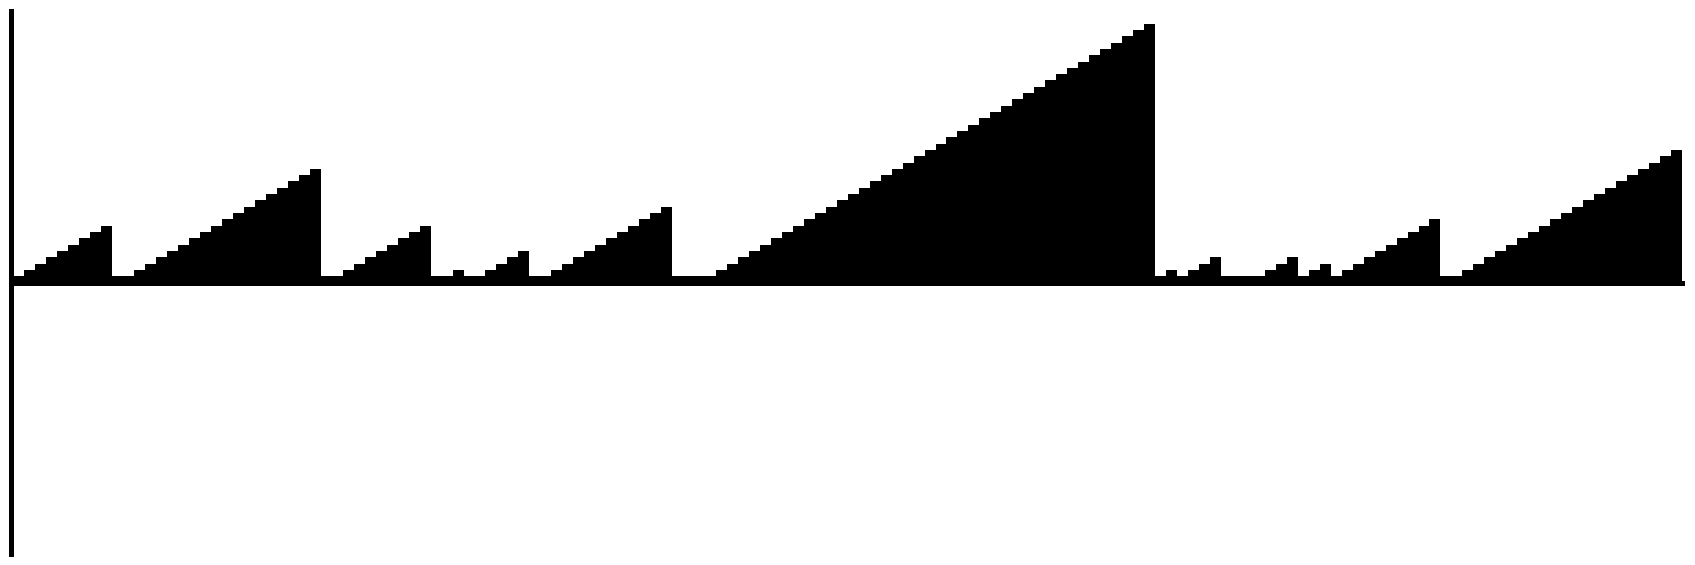

In [85]:
plot_shots(durant_ft)

#### Differentiating make and miss

In [82]:
def plot_shots(shots):
    # filter data into makes and misses
    streak = generate_streak_info(shots)
    streak.loc[streak["result"] == "make", "makes"] = streak["streak_counter"]
    streak.loc[streak["result"] == "miss", "misses"] = -1 * streak["streak_counter"]
    
    # plot the streaks
    
    fig, ax = plt.subplots(figsize=(30,10))
    streak["makes"].plot.bar(ax=ax, color="green", width=1)
    streak["misses"].plot.bar(ax=ax, color="red", width=1)
    
    plt.show()

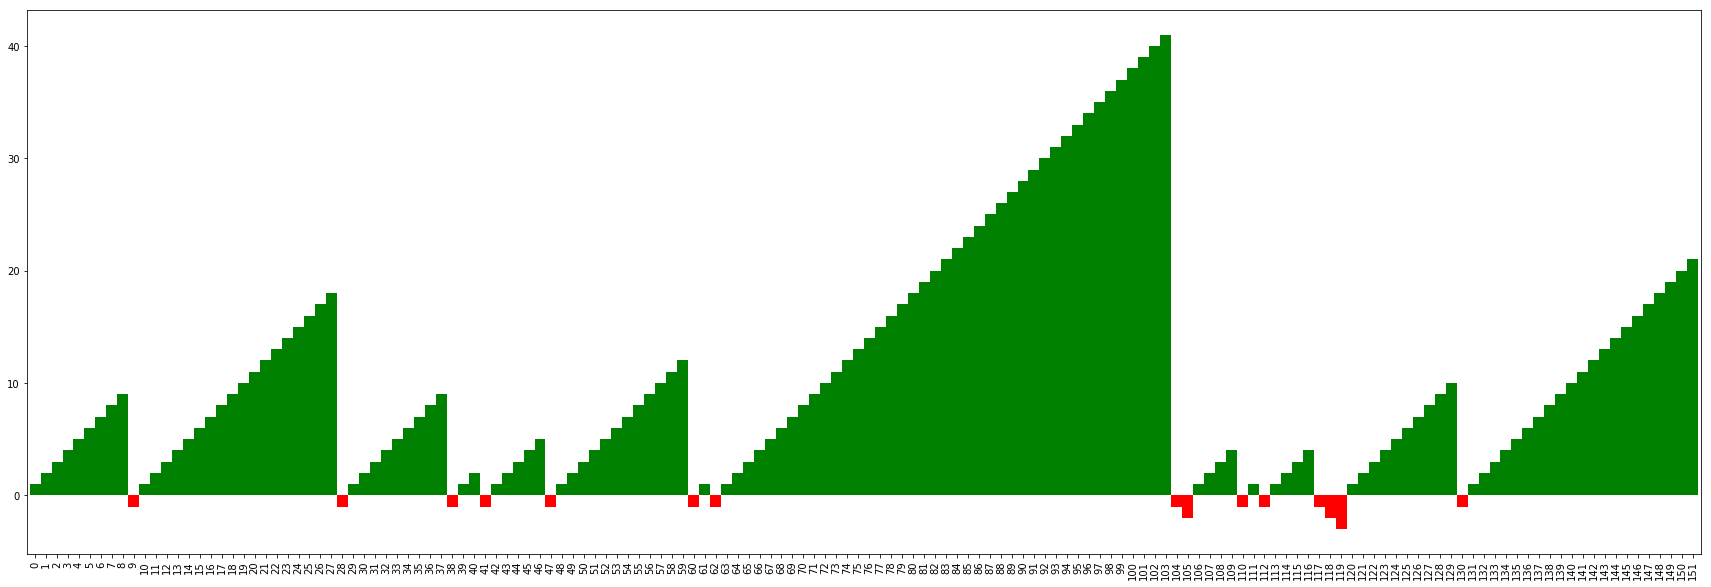

In [83]:
plot_shots(durant_ft)

#### So Kevin Durant hardly misses free throws

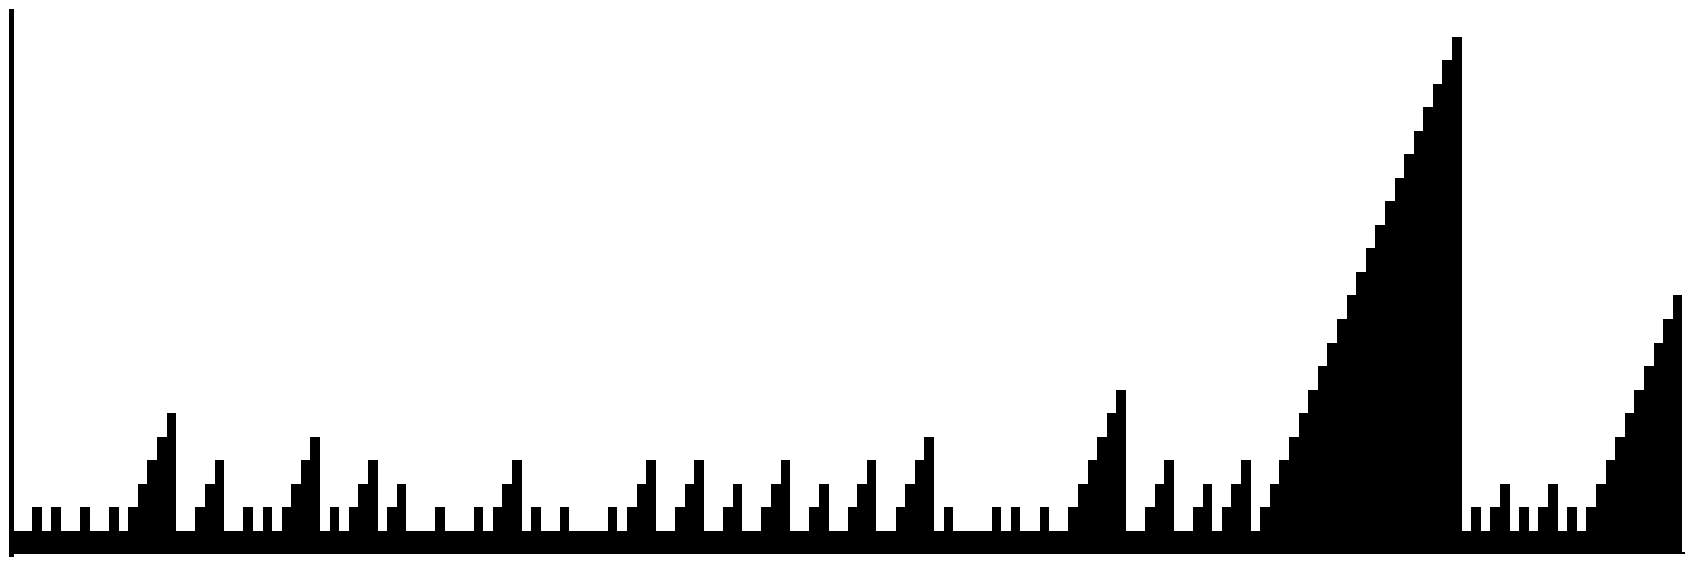

In [78]:
harden_3pt = filter_shots("James Harden", "3PT")

plot_shots(harden_3pt)

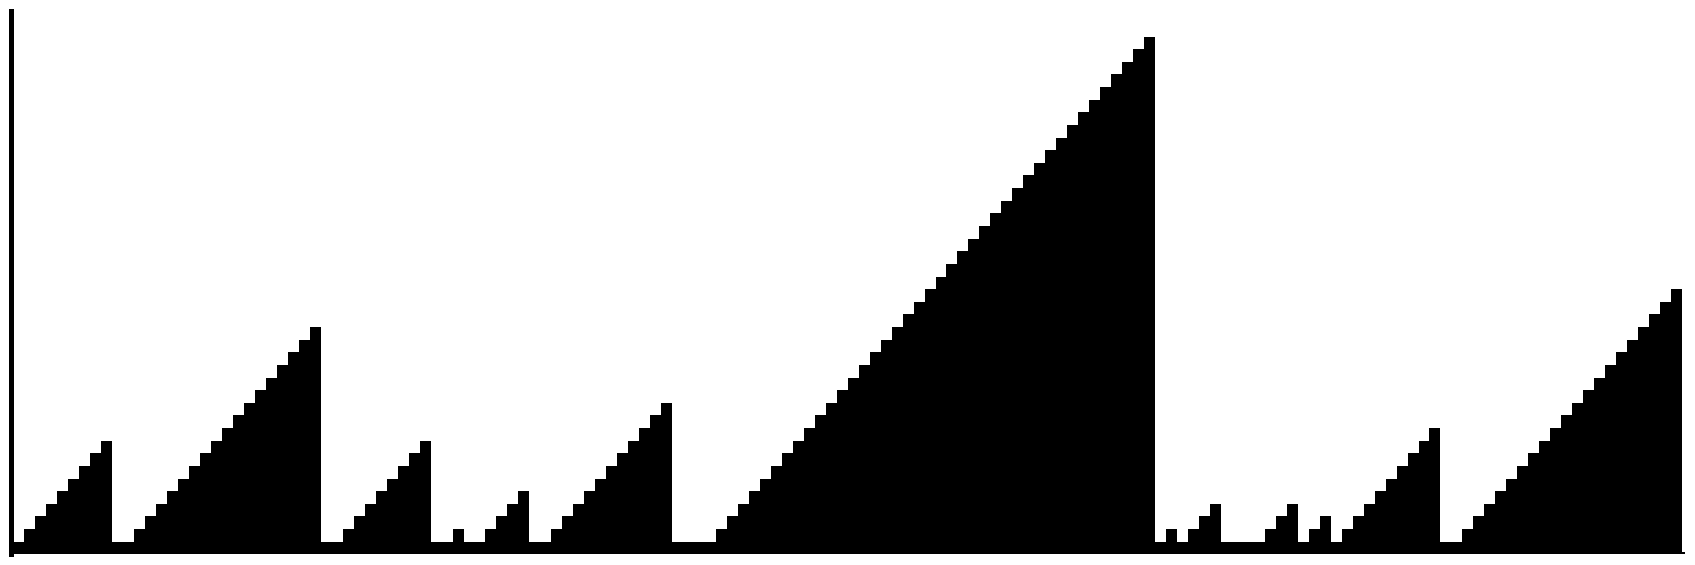

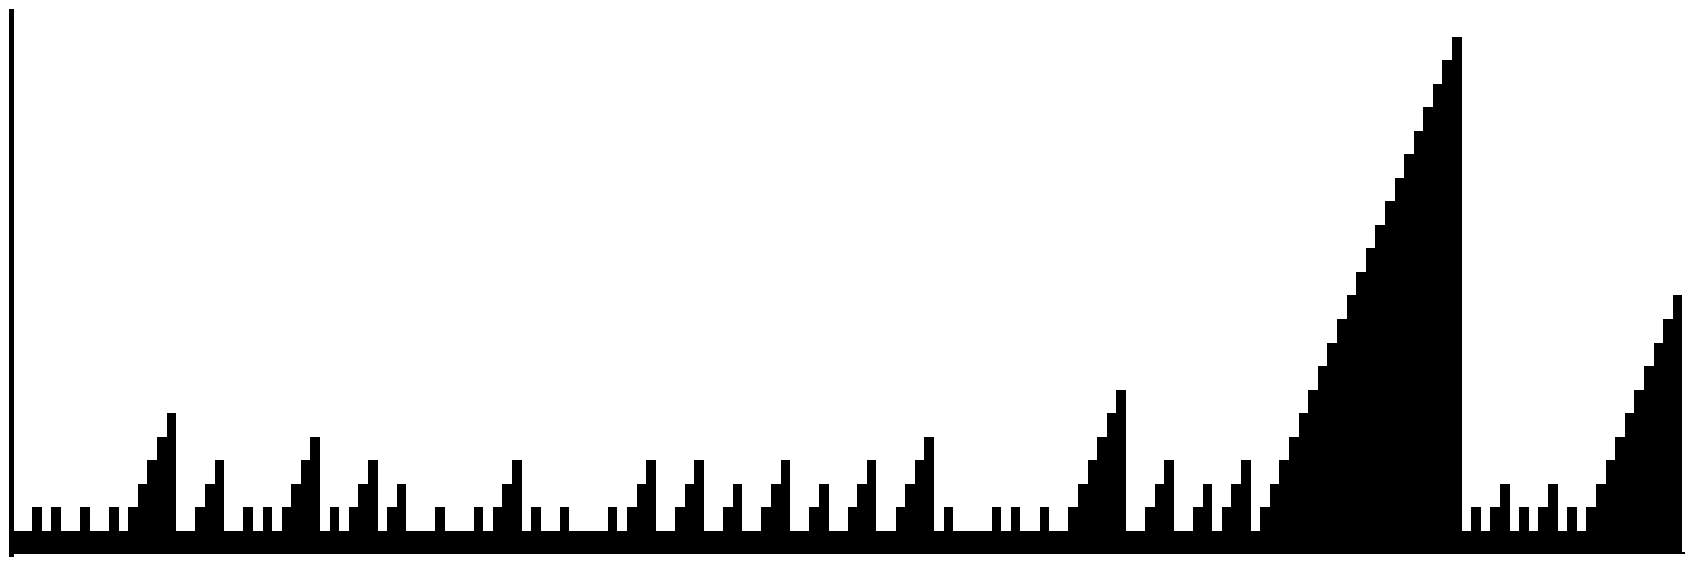

In [79]:
plot_shots(durant_ft)

harden_3pt = filter_shots("James Harden", "3PT")
plot_shots(harden_3pt)

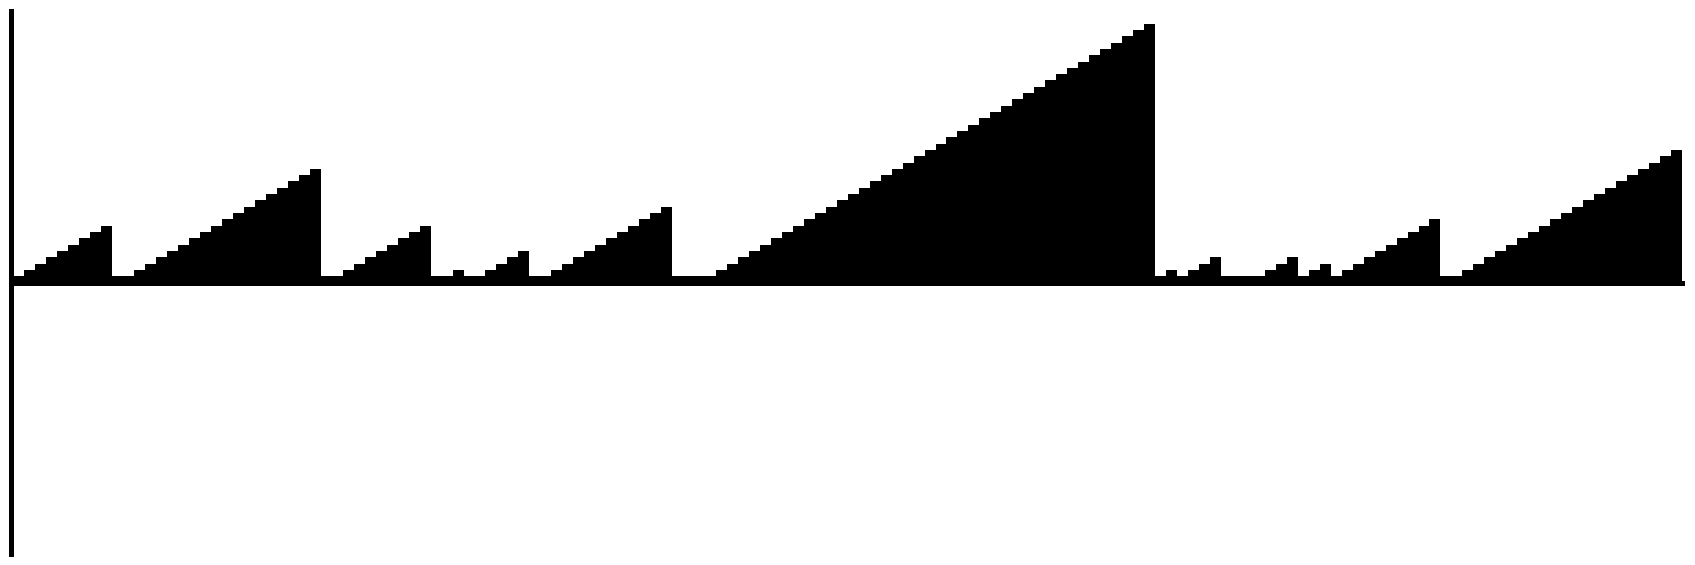

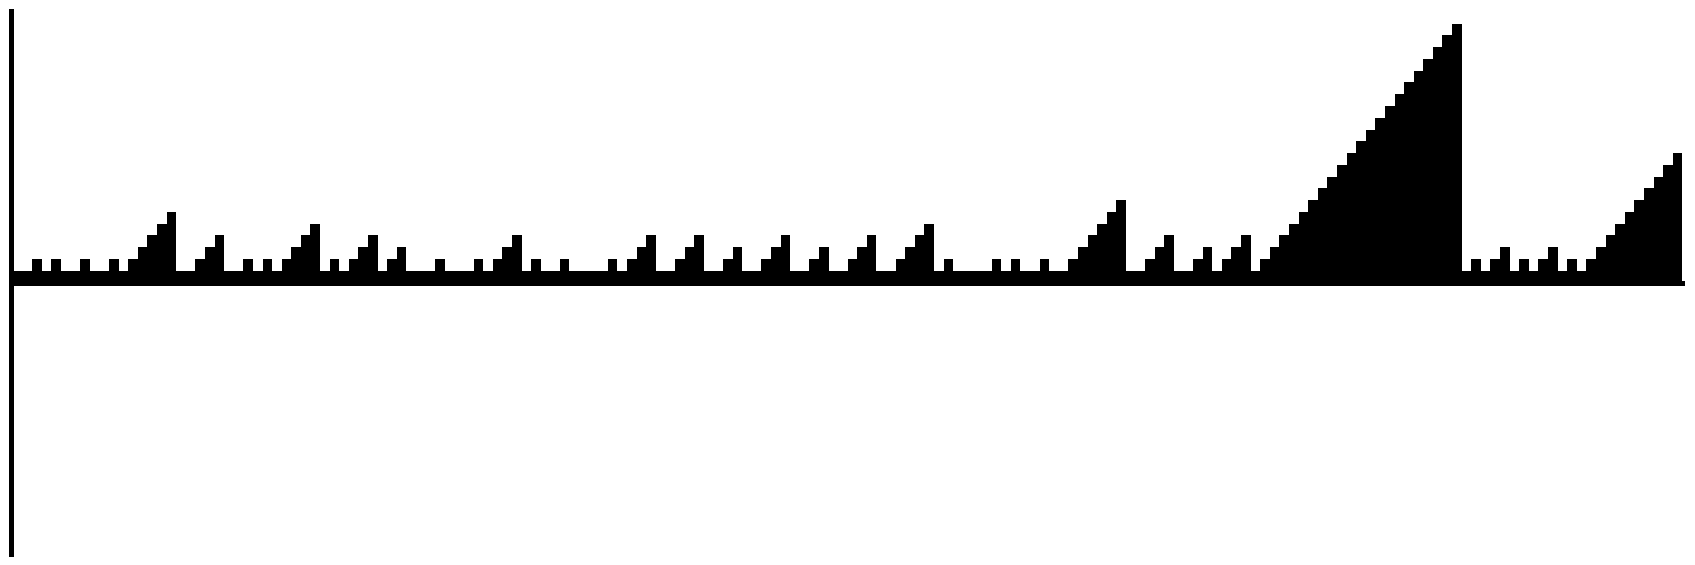

In [81]:
plot_shots(durant_ft)
plot_shots(harden_3pt)

In [86]:
def plot_shots(shots, player_name, shot_info):
    
    # filter data into makes and misses
    streak = generate_streak_info(shots)
    streak.loc[streak['result'] == "make", "makes"] = streak['streak_counter']
    streak.loc[streak['result'] == "miss", "misses"] = -1 * streak['streak_counter']
    
    # plot the streaks
    fig, ax = plt.subplots(figsize=(30,10))
    streak['makes'].plot.bar(ax=ax, color='green', width=1)
    streak['misses'].plot.bar(ax=ax, color='red', width=1)
    # add a horizontal line at y=0
    plt.axhline(y=0, color='black', linewidth=5)
    
    # remove ticks from all sides
    plt.tick_params(axis='both',
                    bottom=False,
                    labelbottom=False,
                    left=False,
                    labelleft=False)
    
    # remove spine from top, bottom and right
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # make the left spine have a line width of 5
    ax.spines['left'].set_lw(5)
    
    # calculate the largest of the y limits, and use that to
    # set symmetrical limits
    limit = np.abs(plt.ylim()).max()
    plt.ylim(-1*limit,limit)
    
    # add summary text 
    x = streak.shape[0] * 0.99
    y1 = limit * 0.8
    y2 = limit * 0.65
    ax.text(x, y1, player_name, horizontalalignment='right', fontsize=40)
    ax.text(x, y2, shot_info, horizontalalignment='right', fontsize=30)
    
    # add background shading
    rect_coords = (-.5, -1 * limit)
    rect_width = streak.shape[0] + .5
    rect_height = 2 * limit
    bg = plt.Rectangle(rect_coords,
                       rect_width,
                       rect_height,
                       color='#f6f6f6',
                       zorder=-1) 
    ax.add_patch(bg)
    
    plt.show()

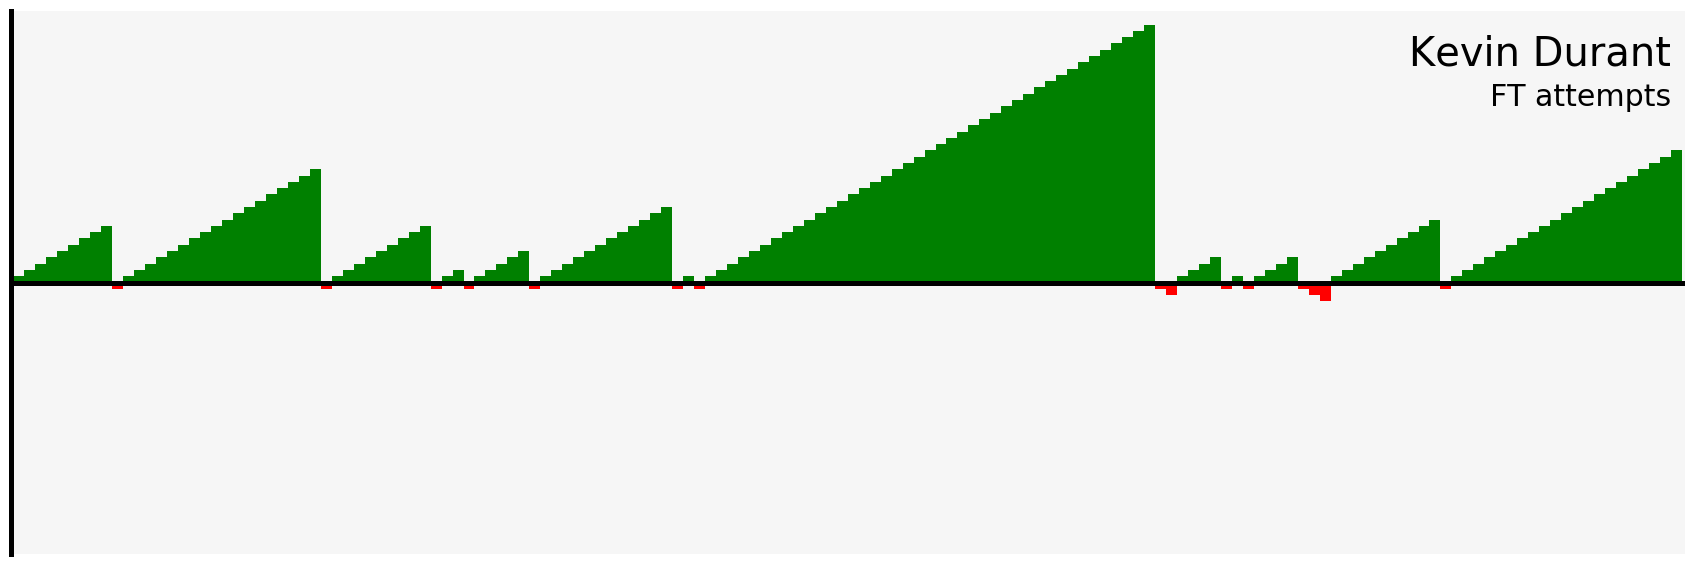

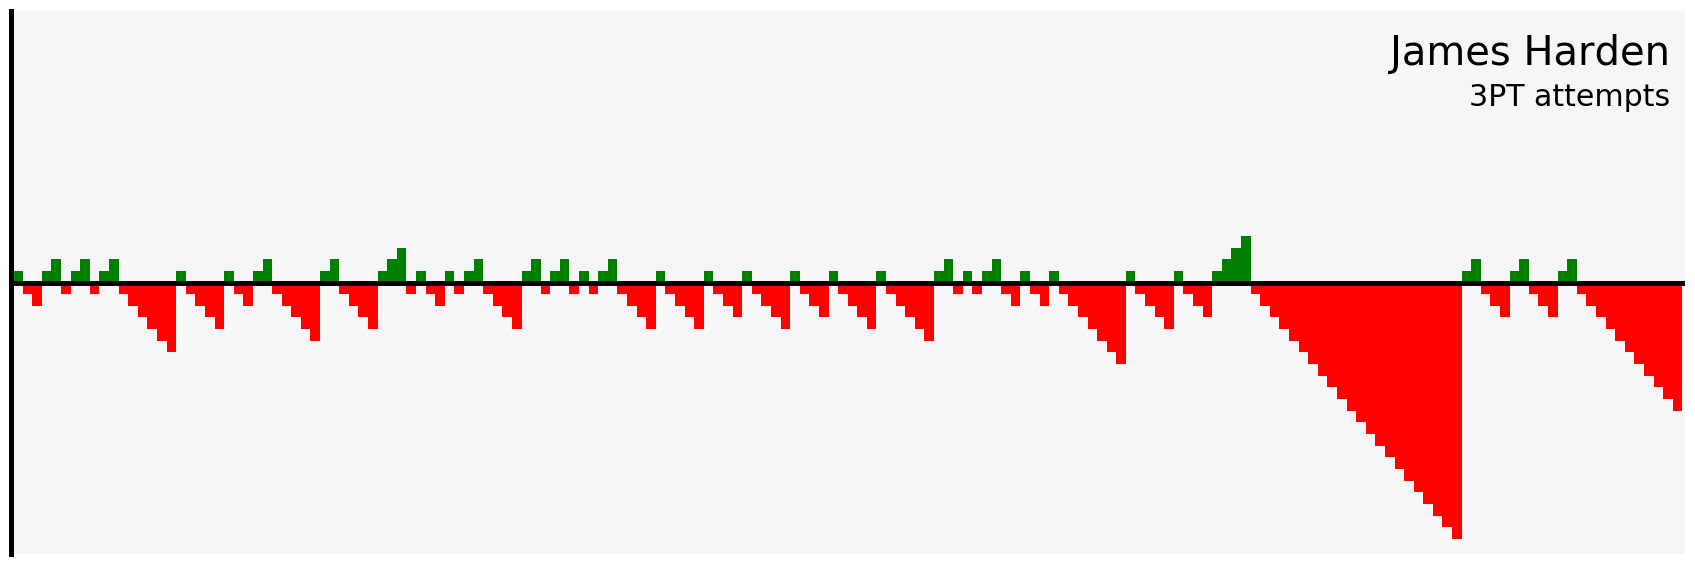

In [87]:
plot_shots(durant_ft, "Kevin Durant", "FT attempts")

plot_shots(harden_3pt, "James Harden", "3PT attempts")

### Visualising interesting streaks

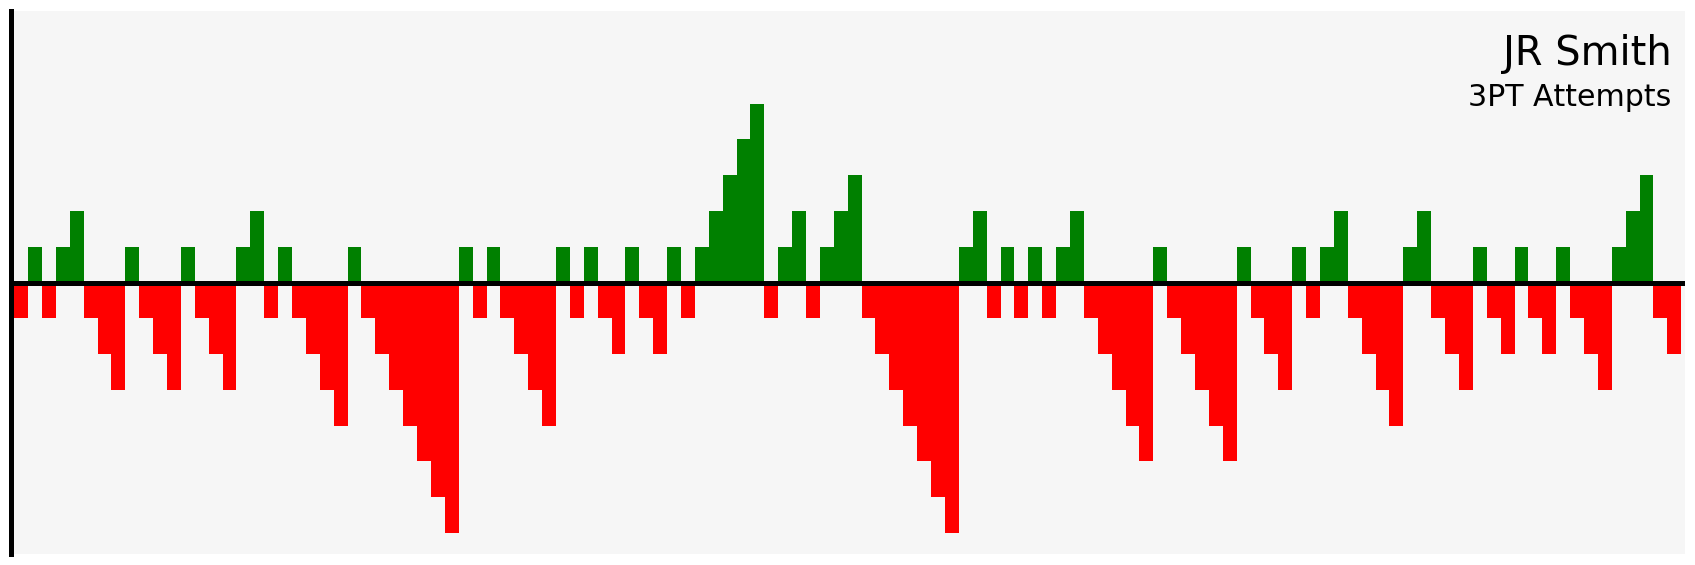

In [88]:
def filter_and_plot(name, shot_type):
    shots = filter_shots(name, shot_type)
    label = f"{shot_type} Attempts"
    
    plot_shots(shots, name, label)

filter_and_plot("JR Smith", "3PT")

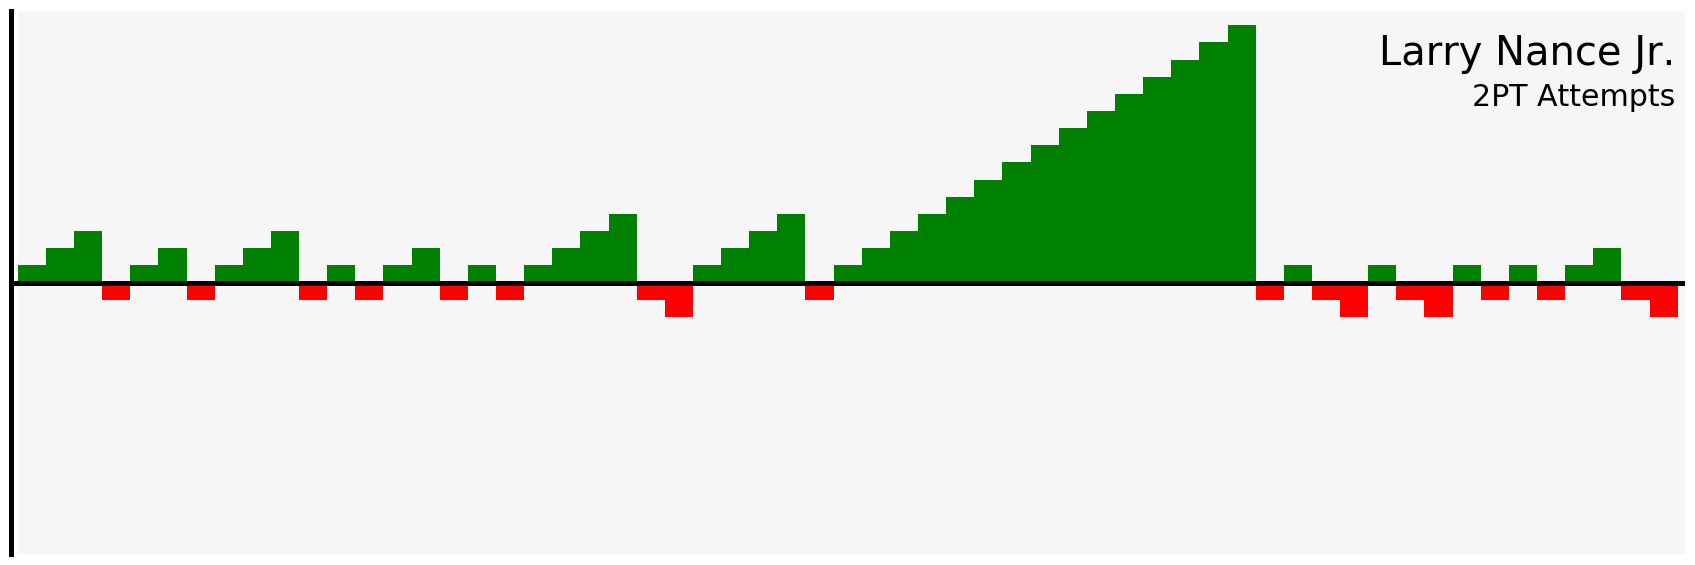

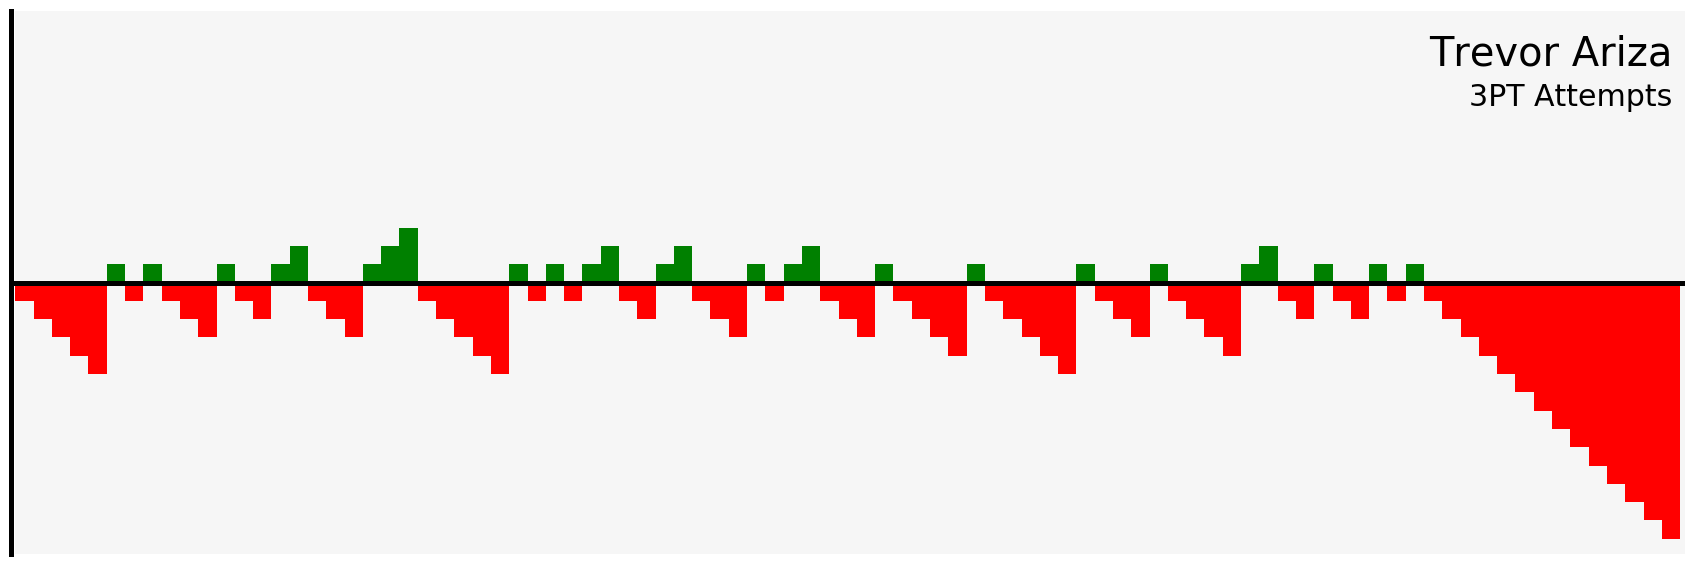

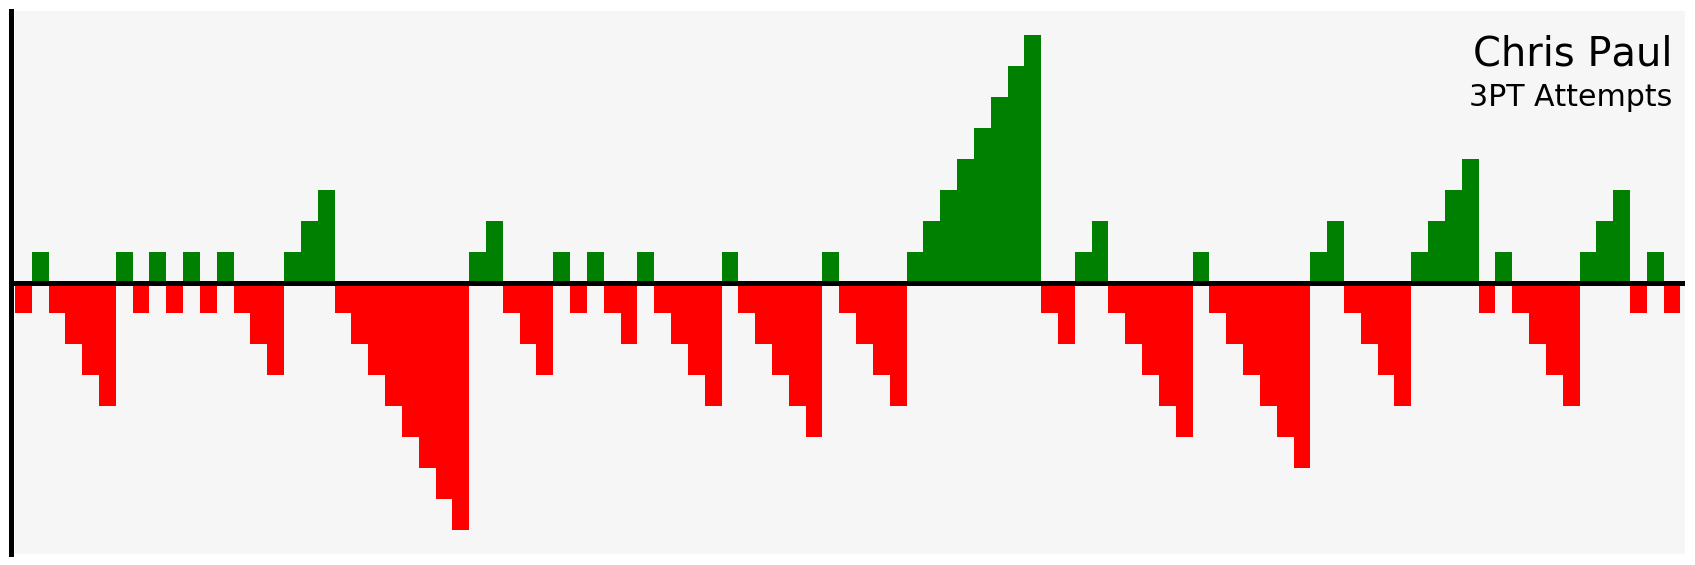

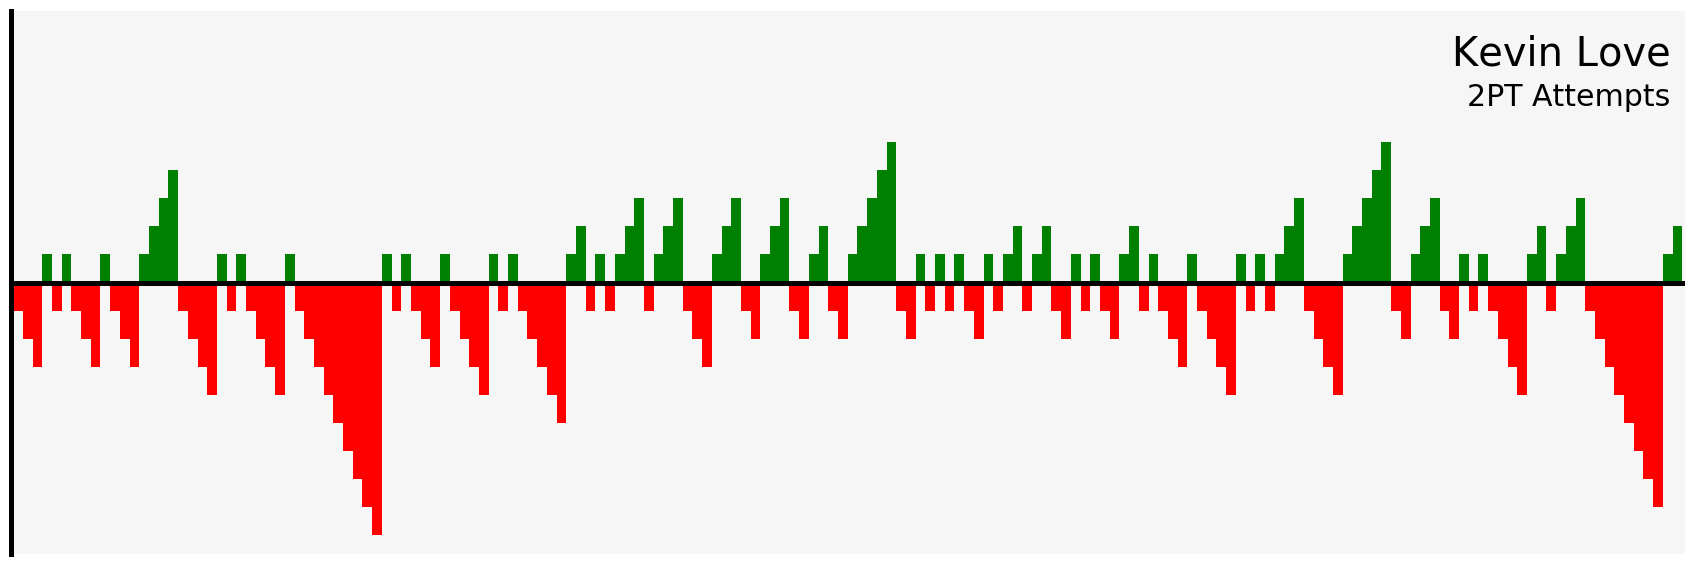

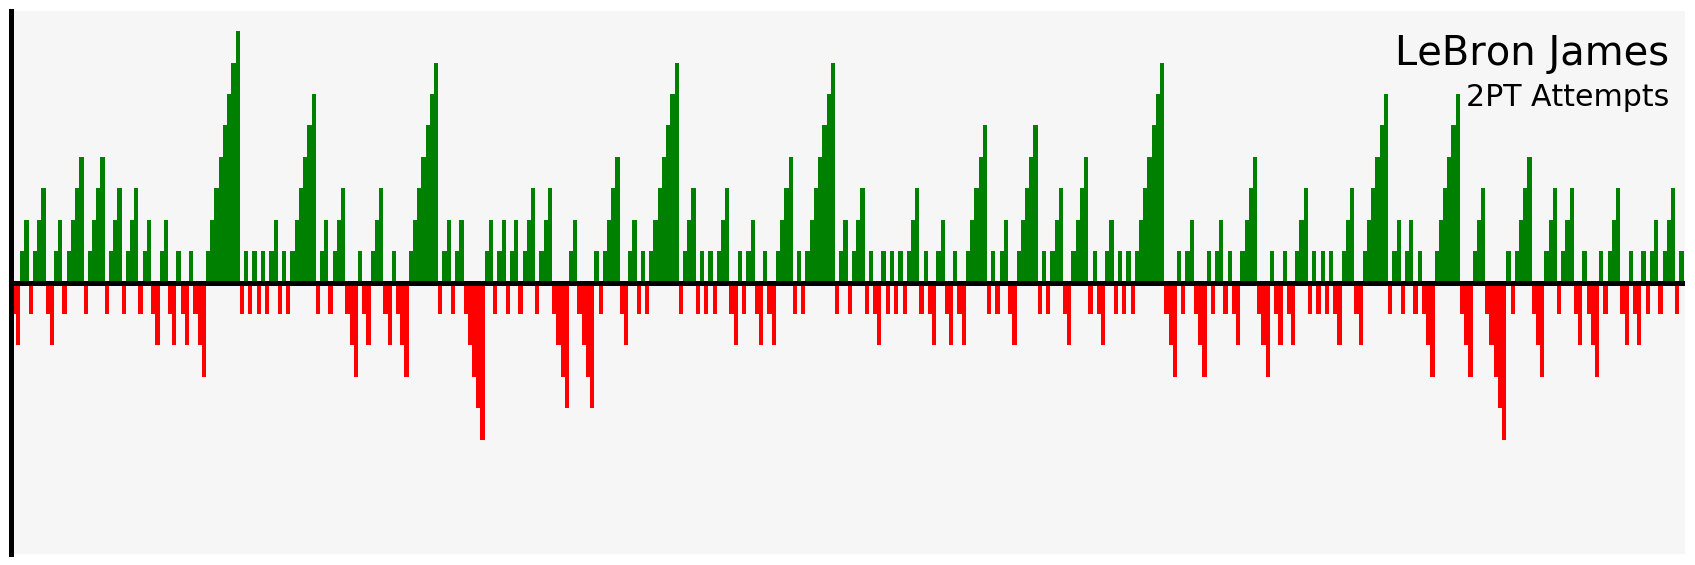

In [89]:
filter_and_plot("Larry Nance Jr.", "2PT")

filter_and_plot("Trevor Ariza", "3PT")

filter_and_plot("Chris Paul", "3PT")

filter_and_plot("Kevin Love", "2PT")

filter_and_plot("LeBron James", "2PT")